# Empirical Orthogonal Function (EOF) Time Series Analysis using Singular Value Decomposition

## Overview

Empirical Orthogonal Function (EOF) analysis is a powerful statistical technique used in climate science, oceanography, and meteorology to identify the dominant patterns of variability in spatiotemporal datasets. EOF analysis is mathematically equivalent to Principal Component Analysis (PCA) and is implemented using Singular Value Decomposition (SVD).

## Mathematical Foundation

### The Data Matrix
Consider a spatiotemporal dataset represented as a matrix **X** of size *m* × *n*, where:
- *m* = number of spatial locations (grid points)
- *n* = number of time steps
- Each column represents the spatial pattern at a given time
- Each row represents the time series at a given location

### Singular Value Decomposition (SVD)
The EOF analysis decomposes the data matrix **X** using SVD:

$$\mathbf{X} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T$$

Where:
- **U** (*m* × *m*): Left singular vectors → **Spatial EOFs** (orthogonal spatial patterns)
- **Σ** (*m* × *n*): Diagonal matrix of singular values → **Amplitudes** (strength of each mode)
- **V** (*n* × *n*): Right singular vectors → **Principal Components (PCs)** (time series coefficients)

### Physical Interpretation

1. **Spatial EOFs (U)**: Orthogonal spatial patterns that represent the dominant modes of variability
2. **Principal Components (V)**: Time series showing how each spatial pattern evolves over time
3. **Singular Values (Σ)**: Measure the amplitude/importance of each mode

### Variance Explained
The fraction of total variance explained by the *k*-th mode is:

$$\text{Variance}_k = \frac{\sigma_k^2}{\sum_{i=1}^r \sigma_i^2}$$

where *r* is the rank of the matrix and σₖ is the *k*-th singular value.

## Key Properties

1. **Orthogonality**: EOFs are spatially orthogonal, and PCs are temporally orthogonal
2. **Optimal Basis**: EOFs provide the most efficient representation of the data variance
3. **Dimensionality Reduction**: Often, the first few EOFs capture most of the variance
4. **Statistical Independence**: PCs are uncorrelated (zero covariance)

## Applications in Climate Science

- **Climate Modes**: Identifying patterns like El Niño-Southern Oscillation (ENSO), Arctic Oscillation (AO)
- **Data Compression**: Representing complex datasets with fewer variables
- **Noise Reduction**: Filtering out high-frequency noise by retaining dominant modes
- **Trend Analysis**: Separating long-term trends from variability patterns
- **Model Validation**: Comparing observed and simulated climate patterns

## Preprocessing Considerations

1. **Centering**: Remove the temporal mean at each grid point
2. **Weighting**: Apply area weighting for gridded data on spherical coordinates
3. **Normalization**: Consider standardizing by standard deviation if variables have different units
4. **Missing Data**: Handle gaps in the dataset appropriately

## Limitations

- **Linear Assumption**: EOF assumes linear relationships
- **Stationarity**: Assumes statistical properties don't change over time
- **Orthogonality Constraint**: May artificially separate physically related patterns
- **Interpretation**: EOFs are mathematical constructs and may not always have clear physical meaning

## Application Example: EOF Analysis of Precipitation Data

### Research Paper
For an example of application of EOF analysis to precipitation data, see this study:

**"Drought in the Western United States: Its Connections with Large-Scale Oceanic Oscillations"**  
*Atmosphere* 2019, 10(2), 82  
Link: [https://www.mdpi.com/2073-4433/10/2/82](https://www.mdpi.com/2073-4433/10/2/82)

This paper demonstrates how EOF analysis can be used to:
- Identify dominant spatial patterns of precipitation variability
- Extract principal modes of precipitation anomalies
- Analyze temporal evolution of precipitation patterns
- Understand regional climate dynamics

### Visualization Example

![EOF Analysis Result](atmosphere-10-00082-g001.png)

*Figure: Example of EOF analysis applied to precipitation data, showing spatial patterns and temporal components derived through singular value decomposition.*

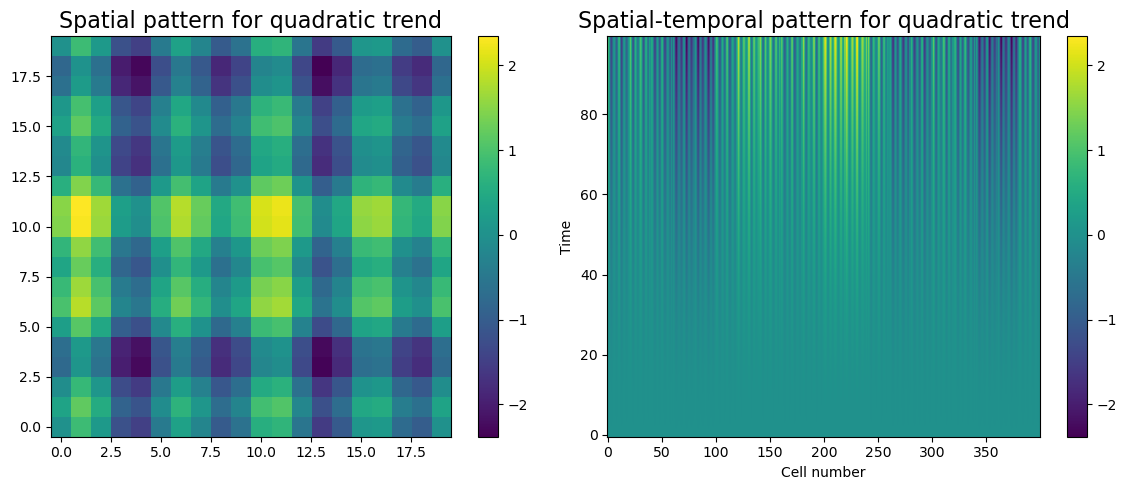

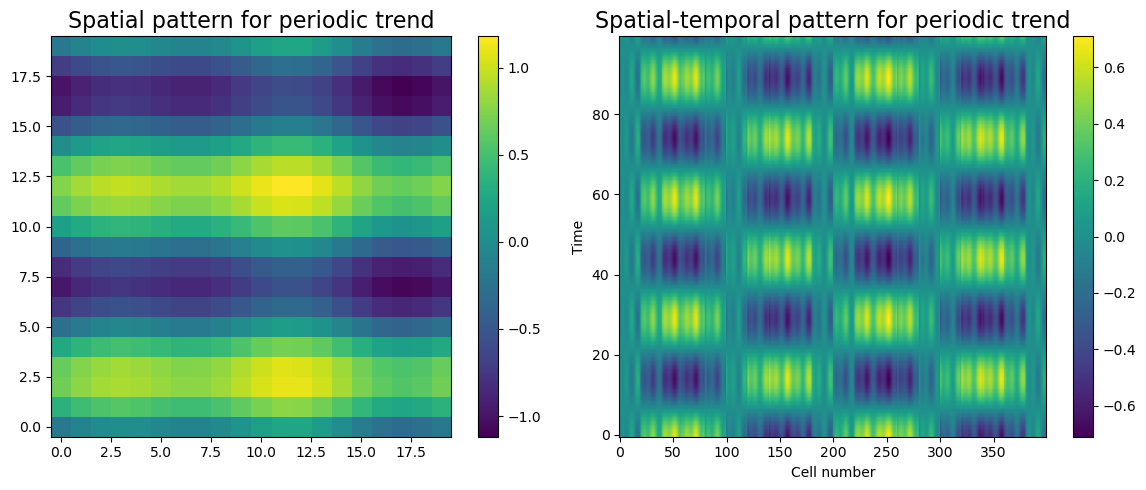

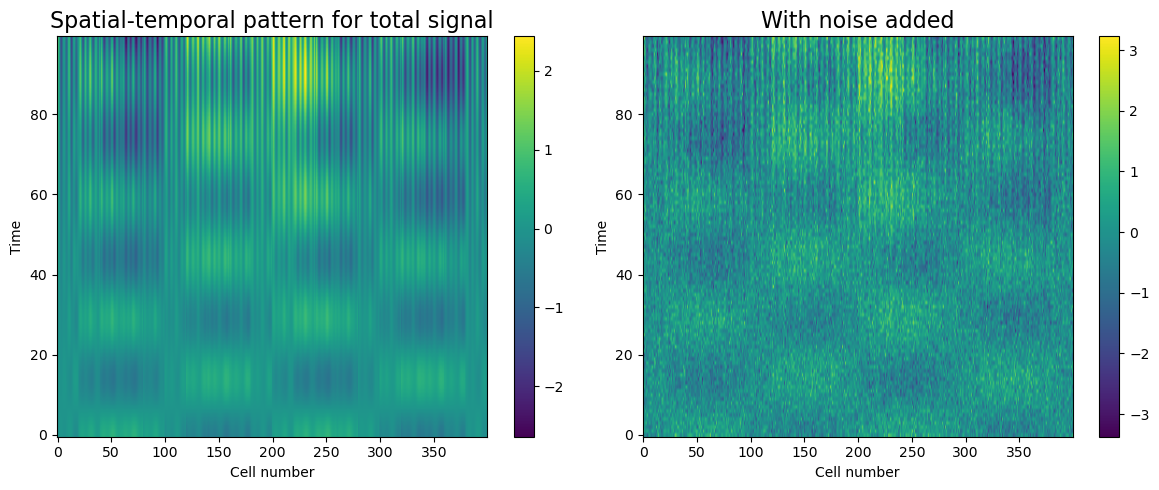

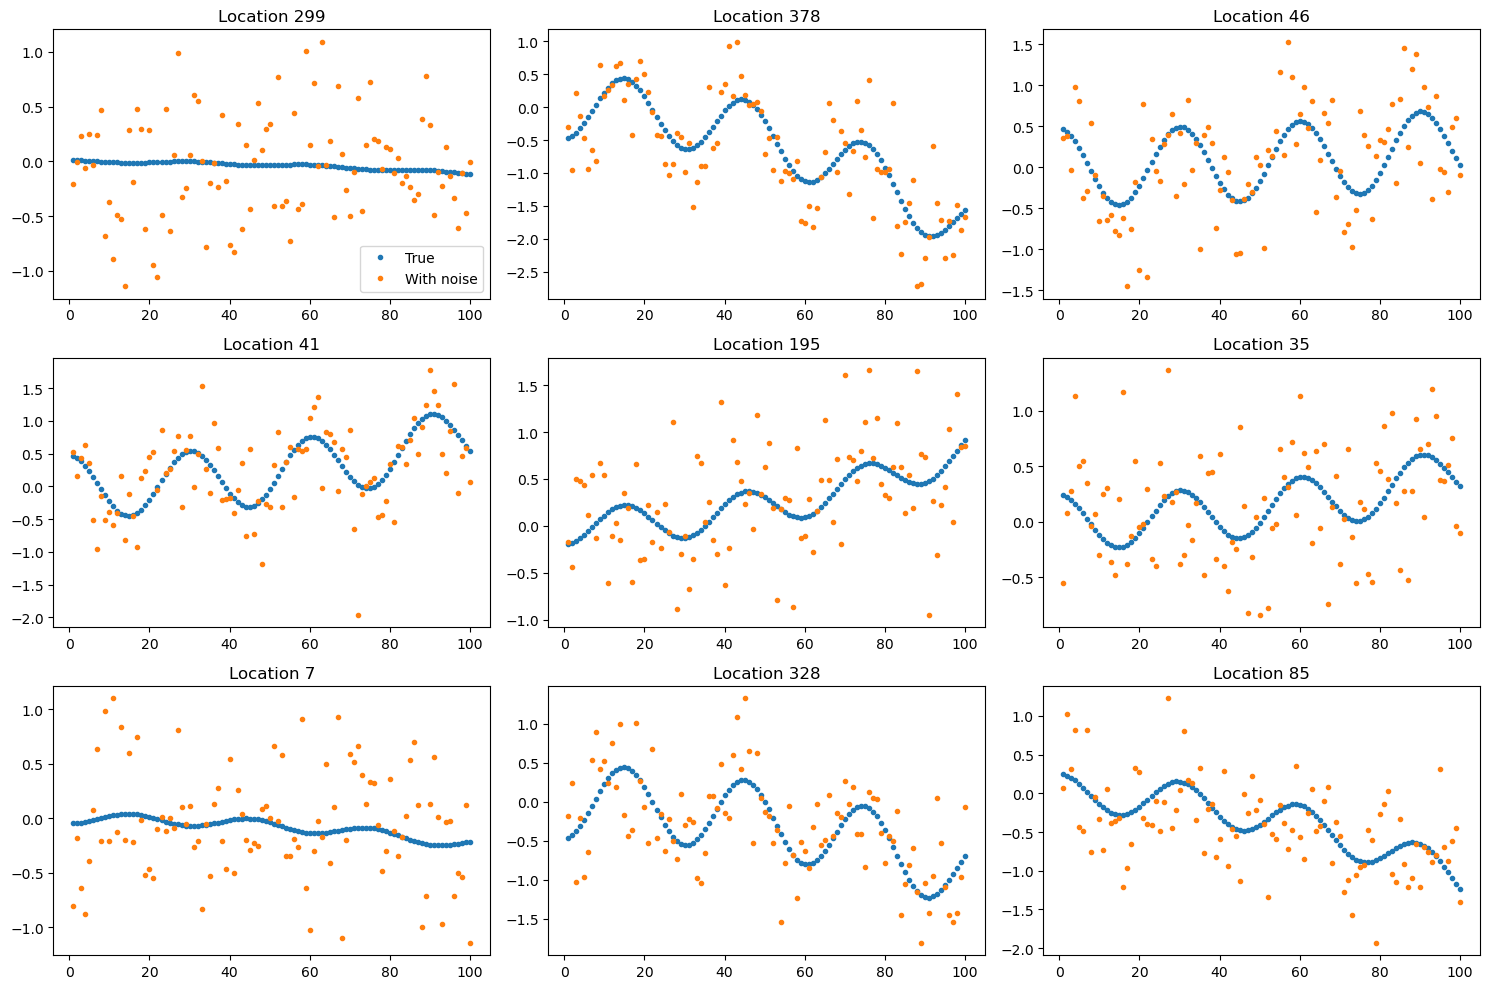

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
import random

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic spatio-temporal data set on a regular grid
x = np.linspace(-200, 200, 20)
y = np.linspace(-200, 200, 20)
Xcoord, Ycoord = np.meshgrid(x, y)
Xcoord = Xcoord.flatten()
Ycoord = Ycoord.flatten()

# Regular time intervals
N = 100  # number of times
dt = 1   # time intervals
t = np.arange(dt, N*dt + dt, dt)

# Noise level
Noise = 0.5

################################
### Quadratic trend
# Sinusoidal spatial wavelengths
L1x = 200
L1y = 300
L2x = 100
L2y = 100

# Make spatial pattern
D = (np.random.rand() * np.cos(2*np.pi*Xcoord/L1x) + 
     np.random.rand() * np.sin(2*np.pi*Xcoord/L2x))
D = (D + np.random.rand() * np.cos(2*np.pi*Ycoord/L1y) + 
     np.random.rand() * np.sin(2*np.pi*Ycoord/L2y))

ts = (t/np.max(t))**2
Dt = np.outer(ts, D)

t1 = ts
D1 = D
D1t = Dt

# Plot spatial and temporal patterns for quadratic trend
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

im1 = ax1.imshow(D1.reshape(20, 20), origin='lower')
ax1.set_title('Spatial pattern for quadratic trend', fontsize=16)
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(D1t, aspect='auto', origin='lower')
ax2.set_title('Spatial-temporal pattern for quadratic trend', fontsize=16)
ax2.set_xlabel('Cell number')
ax2.set_ylabel('Time')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

################################
### Periodic trend
# Sinusoidal spatial terms
L1x = 400
L1y = 600
L2x = 200
L2y = 200

D = (np.random.rand() * np.cos(2*np.pi*Xcoord/L1x) + 
     np.random.rand() * np.sin(2*np.pi*Xcoord/L2x))
D = (D + np.random.rand() * np.cos(2*np.pi*Ycoord/L1y) + 
     np.random.rand() * np.sin(2*np.pi*Ycoord/L2y))

T = 30  # period of harmonic oscillation
ts = np.random.rand() * np.cos(2*np.pi*t/T)
Dt = np.outer(ts, D)

t2 = ts
D2 = D
D2t = Dt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

im1 = ax1.imshow(D2.reshape(20, 20), origin='lower')
ax1.set_title('Spatial pattern for periodic trend', fontsize=16)
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(D2t, aspect='auto', origin='lower')
ax2.set_title('Spatial-temporal pattern for periodic trend', fontsize=16)
ax2.set_xlabel('Cell number')
ax2.set_ylabel('Time')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

################################
### Total signal
D = D1t + D2t
Dtrue = D.copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

im1 = ax1.imshow(D, aspect='auto', origin='lower')
ax1.set_title('Spatial-temporal pattern for total signal', fontsize=16)
ax1.set_xlabel('Cell number')
ax1.set_ylabel('Time')
plt.colorbar(im1, ax=ax1)

# Add noise
D = D + Noise * np.random.randn(*D.shape)

im2 = ax2.imshow(D, aspect='auto', origin='lower')
ax2.set_title('With noise added', fontsize=16)
ax2.set_xlabel('Cell number')
ax2.set_ylabel('Time')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

################################
# Plot some time series, randomly sampled
indices = np.random.choice(D.shape[1], 9, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for k in range(9):
    axes[k].plot(t, Dtrue[:, indices[k]], '.', label='True')
    axes[k].plot(t, D[:, indices[k]], '.', label='With noise')
    axes[k].set_title(f'Location {indices[k]}')
    if k == 0:
        axes[k].legend()

plt.tight_layout()
plt.show()

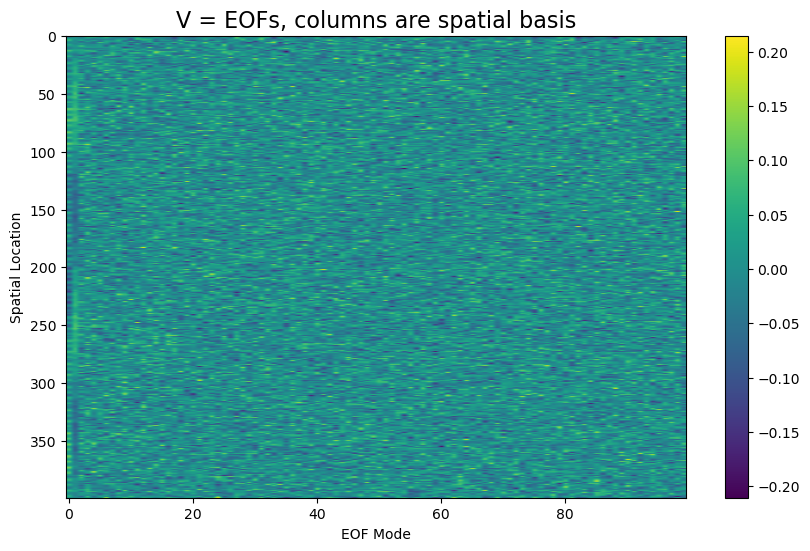

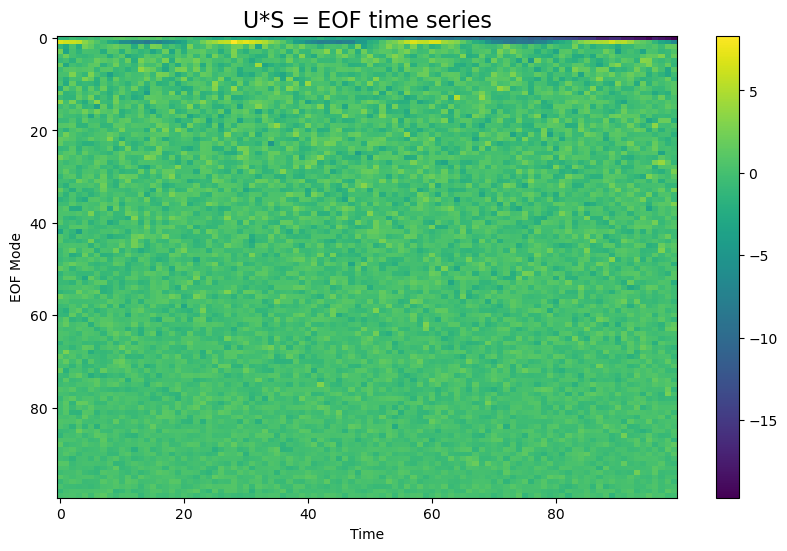

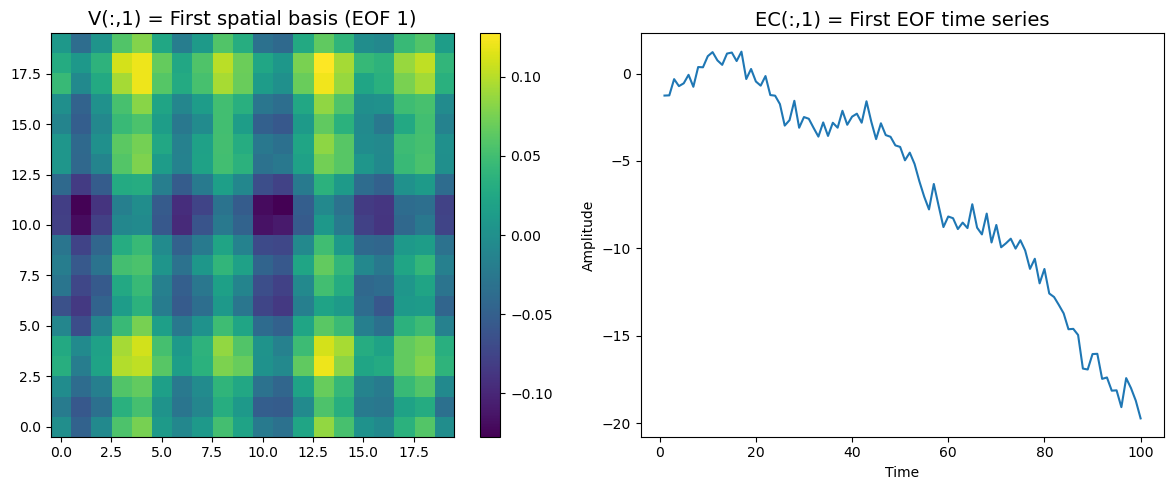

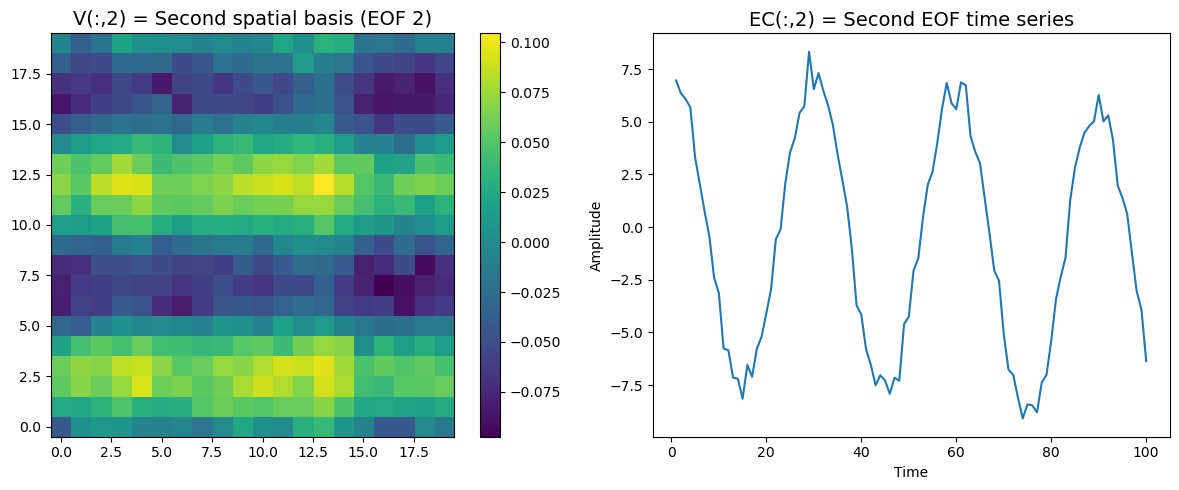

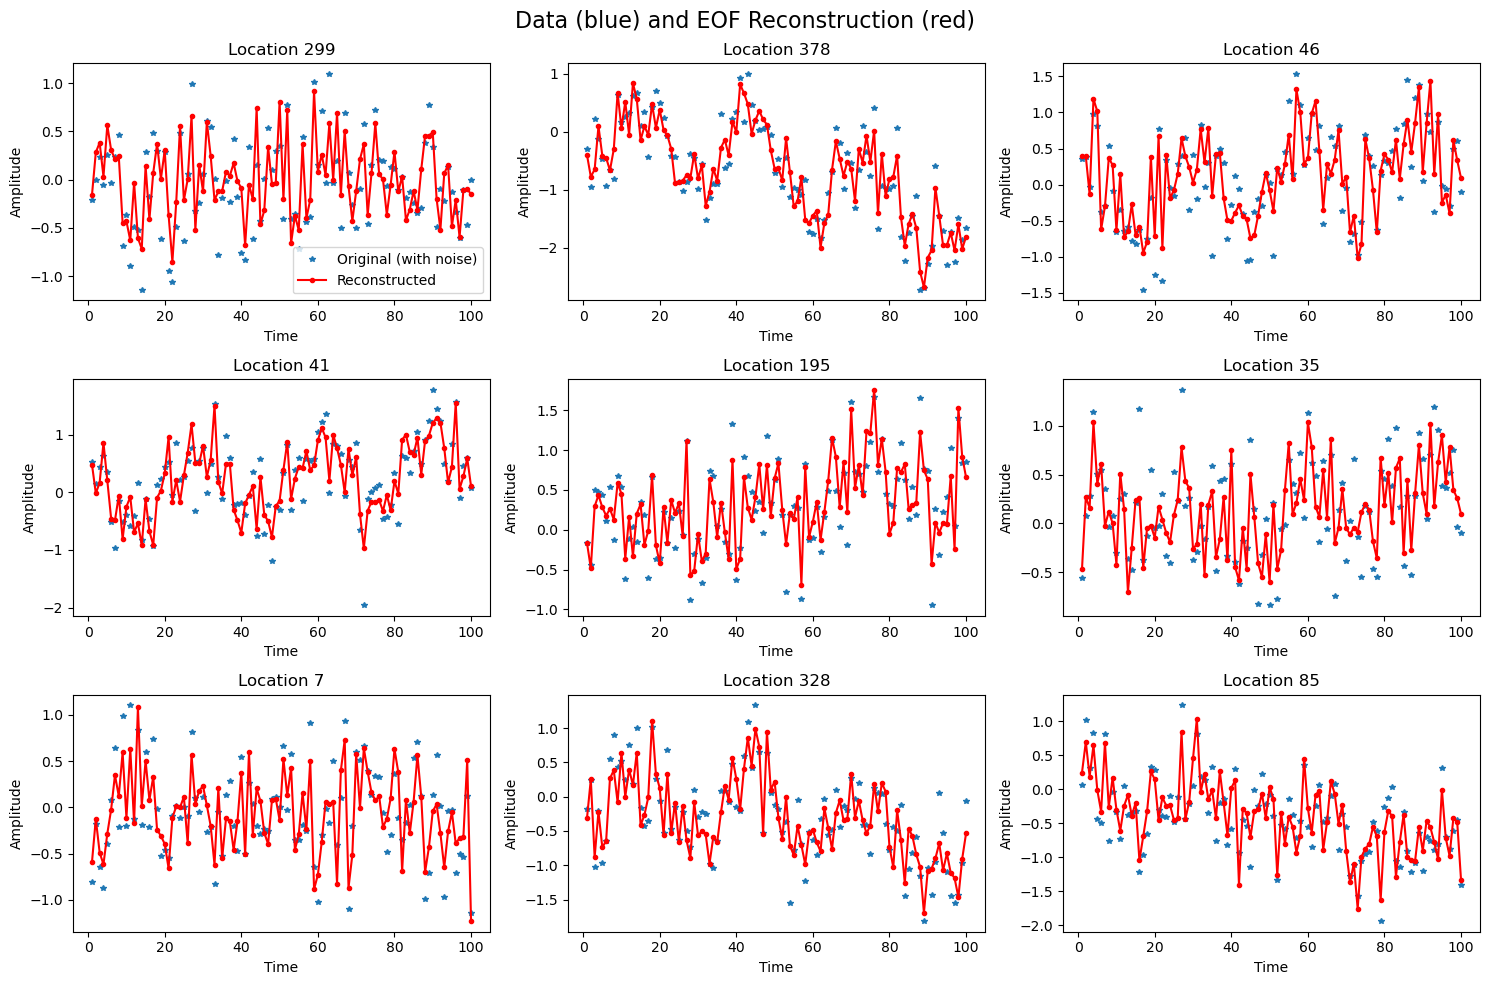

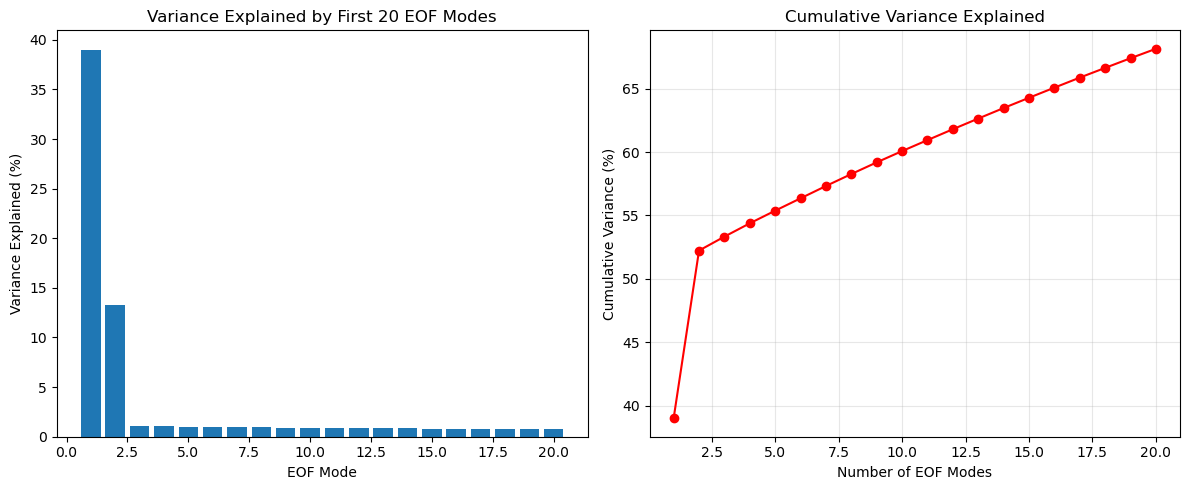

First 10 modes explain 60.1% of the variance
First 20 modes explain 68.1% of the variance
First 50 modes explain 85.7% of the variance


In [2]:
################################
# Compute SVD (EOF Analysis)
# Note: In Python, we don't need to remove the time mean here as it's optional
# D = D - np.mean(D, axis=0)  # Uncomment to remove temporal mean

U, S, Vt = svd(D, full_matrices=False)
V = Vt.T  # Transpose to match MATLAB convention
EC = U @ np.diag(S)  # EOF time series (expansion coefficients)

# EOFs = V (spatial patterns)
# ECs = U*S (EOF time series/expansion coefficient time series)

# Visualize V matrix (EOFs - spatial basis functions)
plt.figure(figsize=(10, 6))
plt.imshow(V, aspect='auto')
plt.colorbar()
plt.title('V = EOFs, columns are spatial basis', fontsize=16)
plt.xlabel('EOF Mode')
plt.ylabel('Spatial Location')
plt.show()

# Visualize EC matrix (EOF time series)
plt.figure(figsize=(10, 6))
plt.imshow(EC.T, aspect='auto')  # Transpose for better visualization
plt.colorbar()
plt.title('U*S = EOF time series', fontsize=16)
plt.xlabel('Time')
plt.ylabel('EOF Mode')
plt.show()

# Plot first two EOFs (spatial basis) and associated EOF time series
# First EOF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

im1 = ax1.imshow(V[:, 0].reshape(20, 20), origin='lower')
ax1.set_title('V(:,1) = First spatial basis (EOF 1)', fontsize=14)
ax1.set_aspect('equal')
plt.colorbar(im1, ax=ax1)

ax2.plot(t, EC[:, 0])
ax2.set_title('EC(:,1) = First EOF time series', fontsize=14)
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Second EOF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

im1 = ax1.imshow(V[:, 1].reshape(20, 20), origin='lower')
ax1.set_title('V(:,2) = Second spatial basis (EOF 2)', fontsize=14)
ax1.set_aspect('equal')
plt.colorbar(im1, ax=ax1)

ax2.plot(t, EC[:, 1])
ax2.set_title('EC(:,2) = Second EOF time series', fontsize=14)
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

################################
# Reconstruct data using first p spatial EOFs
p = 50
Sp = np.diag(S[:p])
Up = U[:, :p]
Vp = V[:, :p]
D_hat = Up @ Sp @ Vp.T

# Plot some time series, randomly sampled (same indices as before for comparison)
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for k in range(9):
    axes[k].plot(t, D[:, indices[k]], '*', label='Original (with noise)', markersize=4)
    axes[k].plot(t, D_hat[:, indices[k]], 'r-o', label='Reconstructed', markersize=3)
    axes[k].set_title(f'Location {indices[k]}')
    axes[k].set_xlabel('Time')
    axes[k].set_ylabel('Amplitude')
    if k == 0:
        axes[k].legend()

plt.suptitle('Data (blue) and EOF Reconstruction (red)', fontsize=16)
plt.tight_layout()
plt.show()

# Calculate and display variance explained by each mode
variance_explained = (S**2) / np.sum(S**2) * 100
cumulative_variance = np.cumsum(variance_explained)

plt.figure(figsize=(12, 5))

# Individual mode variance
plt.subplot(1, 2, 1)
plt.bar(range(1, 21), variance_explained[:20])
plt.title('Variance Explained by First 20 EOF Modes')
plt.xlabel('EOF Mode')
plt.ylabel('Variance Explained (%)')

# Cumulative variance
plt.subplot(1, 2, 2)
plt.plot(range(1, 21), cumulative_variance[:20], 'ro-')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of EOF Modes')
plt.ylabel('Cumulative Variance (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"First 10 modes explain {cumulative_variance[9]:.1f}% of the variance")
print(f"First 20 modes explain {cumulative_variance[19]:.1f}% of the variance")
print(f"First {p} modes explain {cumulative_variance[p-1]:.1f}% of the variance")